# Weather Data Analysis 🌤️🌦️🌨️🌩️☃️🌞

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding Data

In [2]:
df = pd.read_csv("Weather Data.csv")

In [3]:
# Dataset
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
# check how data big is or shape of the dataset 
df.shape

(8784, 8)

In [5]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [6]:
# Check is there any duplicate values in a dataset or not
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [8]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [9]:
df.rename(columns={'Rel Hum_%' : 'Humidity'},inplace=True)
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


# Handling Date and Time Column

In [10]:
# Converting to datetime datatype
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [11]:
print(df['Date/Time'].dtype)

datetime64[ns]


In [12]:
df['Year'] = df['Date/Time'].dt.year

In [13]:
df['Month'] = df['Date/Time'].dt.month_name()

In [14]:
df['Day'] = df['Date/Time'].dt.day

In [15]:
df['Week_name'] = df['Date/Time'].dt.day_name()

In [16]:
df['Hour'] = df['Date/Time'].dt.hour

In [17]:
df.sample(4)

,Date/Time,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Year,Month,Day,Week_name,Hour
8139,2012-12-05 03:00:00,7.8,6.7,93,24,9.7,100.53,Rain,2012,December,5,Wednesday,3
7667,2012-11-15 11:00:00,1.3,-4.8,64,11,24.1,102.79,Cloudy,2012,November,15,Thursday,11
5922,2012-09-03 18:00:00,25.8,12.5,44,13,48.3,101.20,Mostly Cloudy,2012,September,3,Monday,18
4379,2012-07-01 11:00:00,24.6,14.4,53,19,48.3,100.50,Mainly Clear,2012,July,1,Sunday,11


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8784 non-null   datetime64[ns]
 1   Temp_C            8784 non-null   float64       
 2   Dew Point Temp_C  8784 non-null   float64       
 3   Humidity          8784 non-null   int64         
 4   Wind Speed_km/h   8784 non-null   int64         
 5   Visibility_km     8784 non-null   float64       
 6   Press_kPa         8784 non-null   float64       
 7   Weather           8784 non-null   object        
 8   Year              8784 non-null   int32         
 9   Month             8784 non-null   object        
 10  Day               8784 non-null   int32         
 11  Week_name         8784 non-null   object        
 12  Hour              8784 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(2), object(3)
memory usage: 

# Data Visualization

In [19]:
from matplotlib import style
style.use('ggplot')

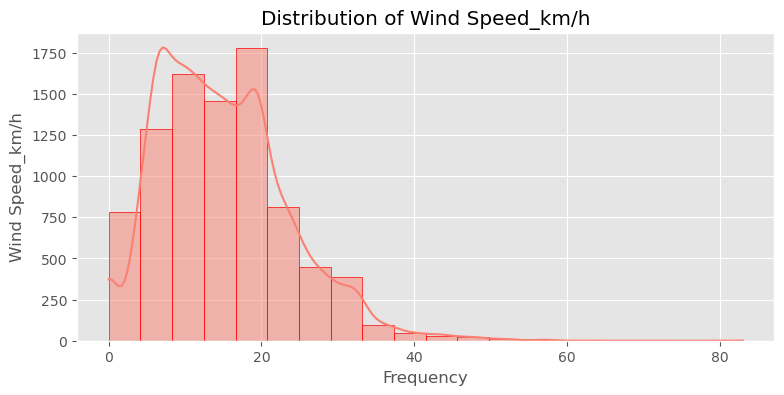

In [20]:
# Create a histogram plot
plt.figure(figsize=(9, 4))
sns.histplot(df['Wind Speed_km/h'], color='salmon', bins=20, edgecolor='r',kde='True')

# Add title and labels
plt.title('Distribution of Wind Speed_km/h')
plt.xlabel('Frequency')
plt.ylabel('Wind Speed_km/h')

# Display the plot
plt.show()

The wind speed histogram illustrates that 20km/h is the prevailing wind speed, indicating its frequent occurrence in the data distribution.

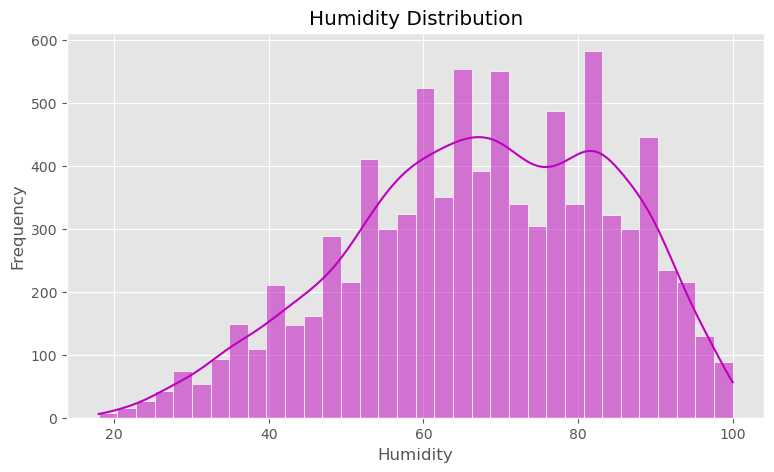

In [21]:
plt.figure(figsize=(9, 5))
sns.histplot(df['Humidity'], color ='m',edgecolor='white',kde=True)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Humidity Distribution')
plt.show()

High humidity readings typically range between 60% and 80%, indicating elevated moisture levels in the atmosphere during the recorded period.

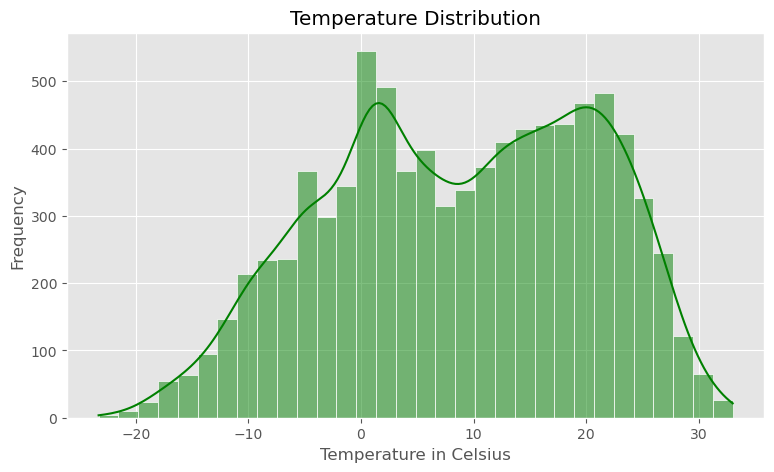

In [22]:
plt.figure(figsize=(9, 5))
sns.histplot(df['Temp_C'], color ='green',edgecolor='white',kde=True)
plt.xlabel('Temperature in Celsius')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()

Temperature analysis reveals predominant readings between 0-20°C, with fluctuations evident in the histogram, indicating dynamic weather conditions for analysis.

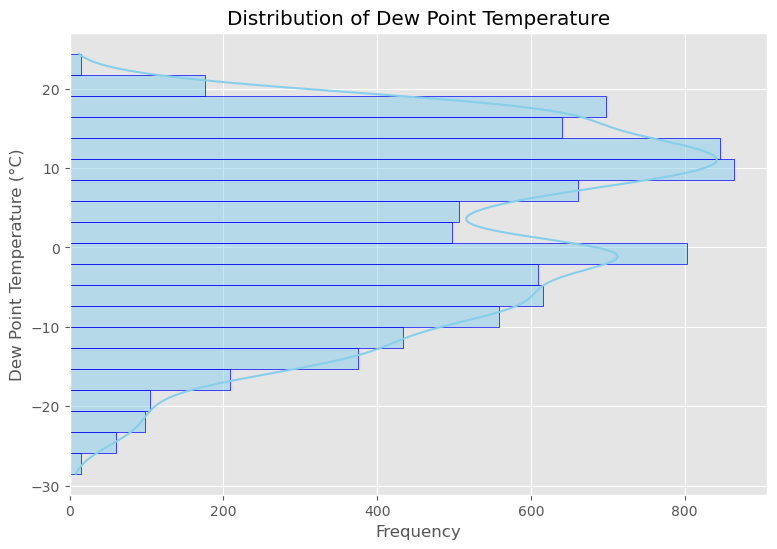

In [23]:
# Create a histogram plot
plt.figure(figsize=(9, 6))
sns.histplot(y=df['Dew Point Temp_C'], color='skyblue', bins=20, edgecolor='b',kde='True')

# Add title and labels
plt.title('Distribution of Dew Point Temperature')
plt.xlabel('Frequency')
plt.ylabel('Dew Point Temperature (°C)')

# Display the plot
plt.show()

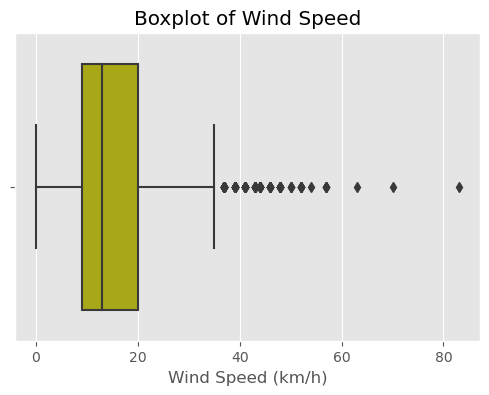

In [24]:
# Create a boxplot of wind speed
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Wind Speed_km/h'],color='y')

# Add title and labels
plt.title('Boxplot of Wind Speed')
plt.xlabel('Wind Speed (km/h)')

# Show the plot
plt.show()

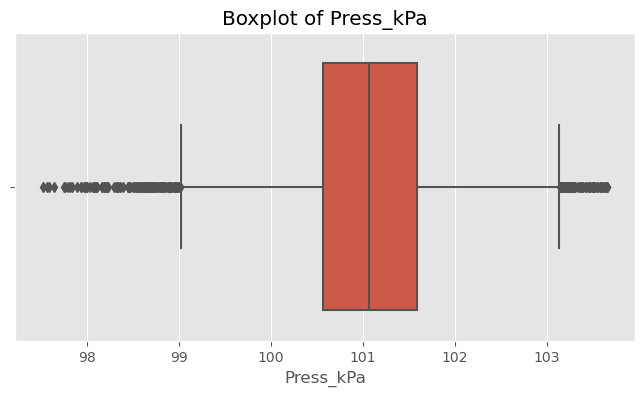

In [25]:
plt.figure(figsize=(8, 4))

# Create a boxplot for 'Press_kPa'
sns.boxplot(x=df['Press_kPa'])

# Add title and labels
plt.title('Boxplot of Press_kPa')
plt.xlabel('Press_kPa')

# Show the plot
plt.show()

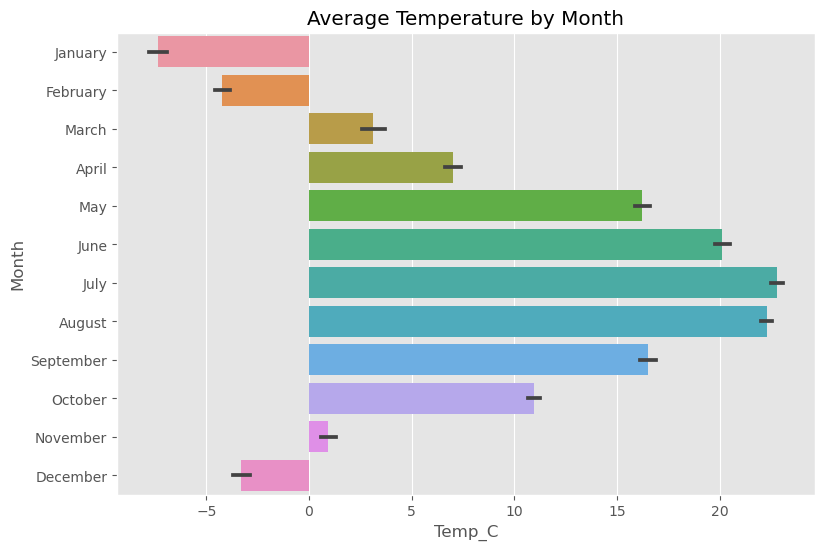

In [26]:
plt.figure(figsize=(9, 6))

# Create a bar plot
sns.barplot(x=df['Temp_C'], y=df['Month'], data=df)

# Add a title to the plot
plt.title('Average Temperature by Month')

# Display the plot
plt.show()

This Graph can provide insights into the Seasonal temperature variations reveal extreme conditions: frigid winters with negative temperatures contrast July's sweltering heat, defining diverse weather patterns for analysis.

In [27]:
df['Weather'].value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [28]:
wthr = df['Weather'].value_counts()  # Count occurrences of each weather condition
top_10_weatherCondition = wthr.nlargest(10)  # Get the top 10 most common weather conditions
top_10_weatherCondition

Weather
Mainly Clear     2106
Mostly Cloudy    2069
Cloudy           1728
Clear            1326
Snow              390
Rain              306
Rain Showers      188
Fog               150
Rain,Fog          116
Drizzle,Fog        80
Name: count, dtype: int64

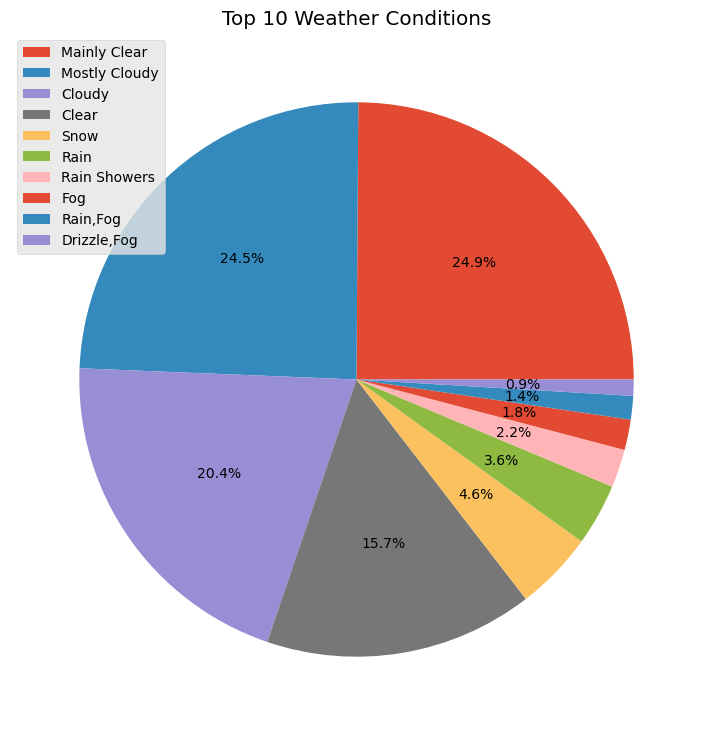

In [29]:
# Create a pie chart to visualize the top 10 weather conditions
plt.figure(figsize=(10, 9))

# Plot the pie chart
plt.pie(top_10_weatherCondition, autopct='%.1f%%')

# Add labels
plt.legend(top_10_weatherCondition.index, loc='best')
plt.title('Top 10 Weather Conditions')

# Display the plot
plt.show()

Weather data predominantly indicates clear conditions 25% of the time, occasional clouds 24%, and intermittent occurrences of snow and rain for analysis.

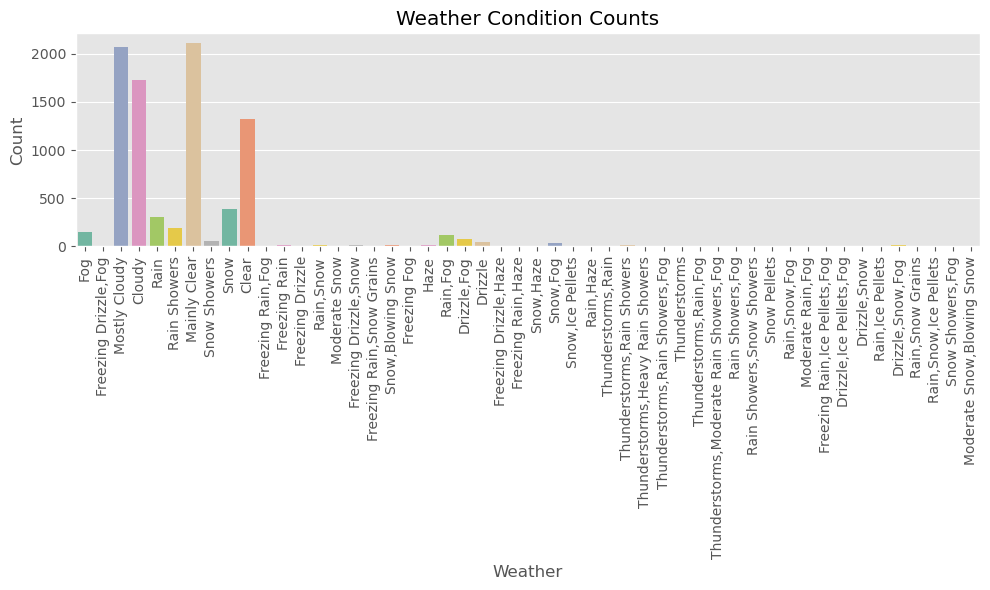

In [30]:
plt.figure(figsize=(10, 6))

# Create a countplot of weather conditions
sns.countplot(x='Weather', data=df, palette='Set2')

# Add title, labels, and rotation for better readability
plt.title('Weather Condition Counts')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()


# Display the plot
plt.show()

Weather analysis highlights prevalent conditions of mostly cloudy skies with frequent clear intervals, shaping predominant atmospheric patterns for examination.

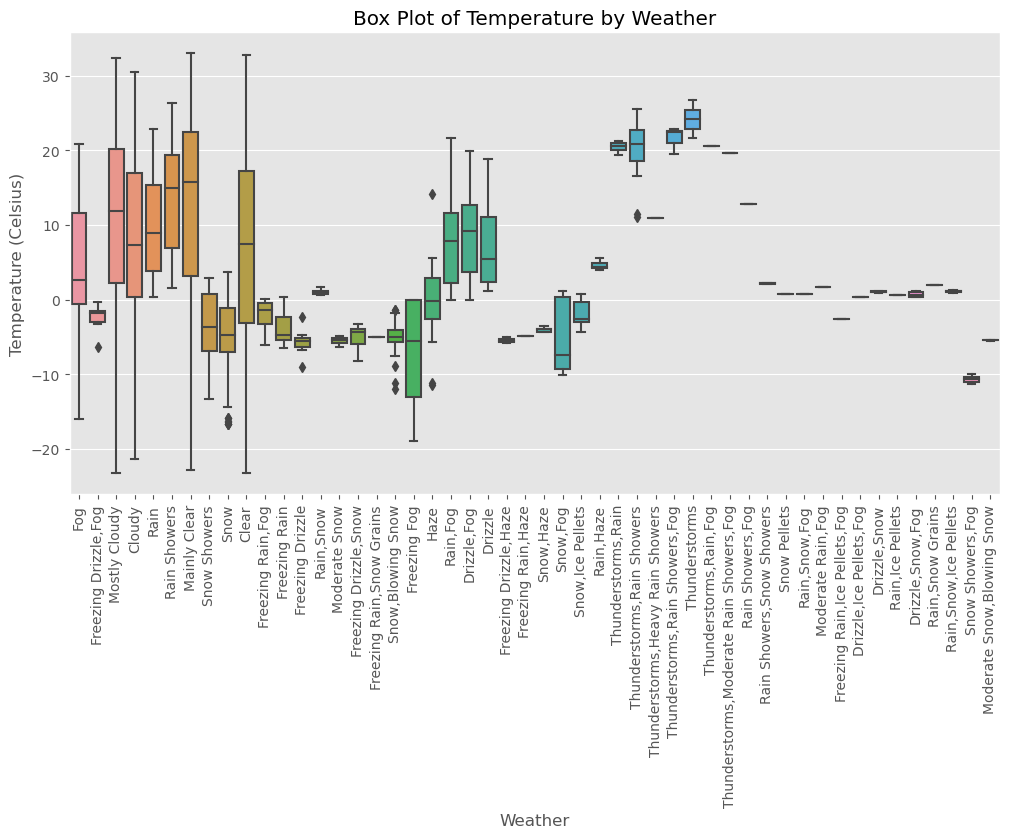

In [31]:
plt.figure(figsize=(12, 6))

# Create a box plot of temperature by weather condition
sns.boxplot(data=df, x='Weather', y='Temp_C')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title and labels
plt.title('Box Plot of Temperature by Weather')
plt.xlabel('Weather')
plt.ylabel('Temperature (Celsius)')

# Show the plot
plt.show()

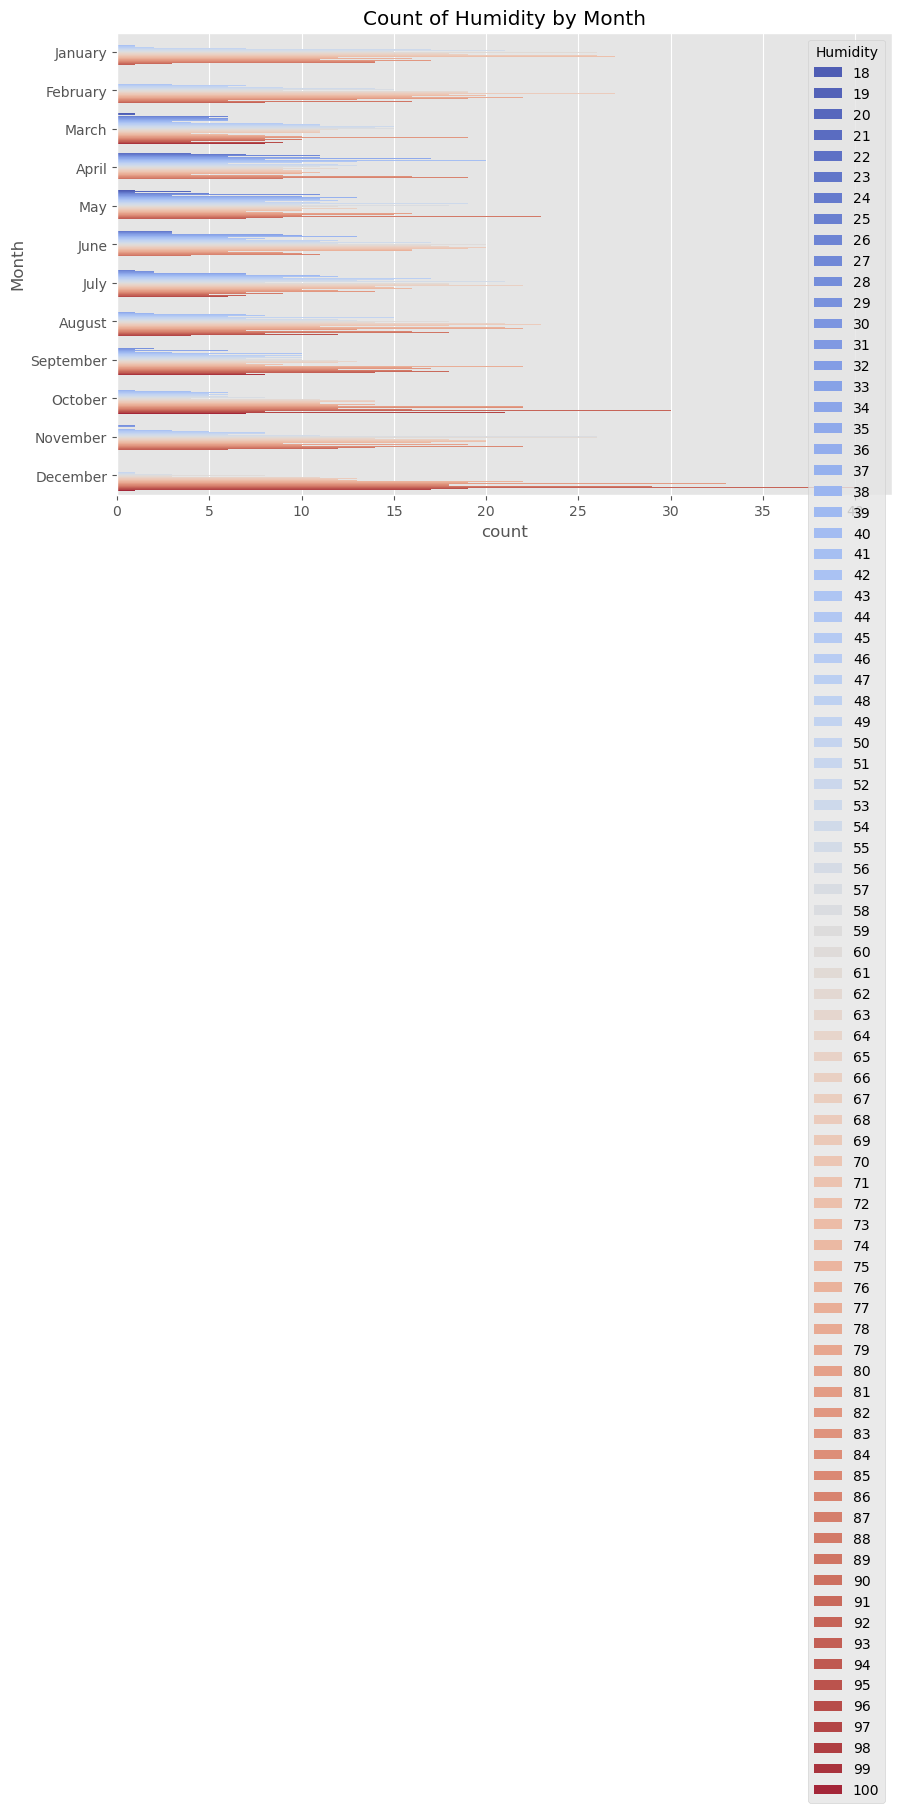

In [32]:
plt.figure(figsize=(10, 6))

# Create a countplot
sns.countplot(y=df['Month'], hue=df['Humidity'], palette='coolwarm')

# Add title
plt.title('Count of Humidity by Month')

# Display the plot
plt.show()

Humidity exhibits an upward trend at month-end, with notable increases observed in March, August, and September, suggesting seasonal variations for analysis.

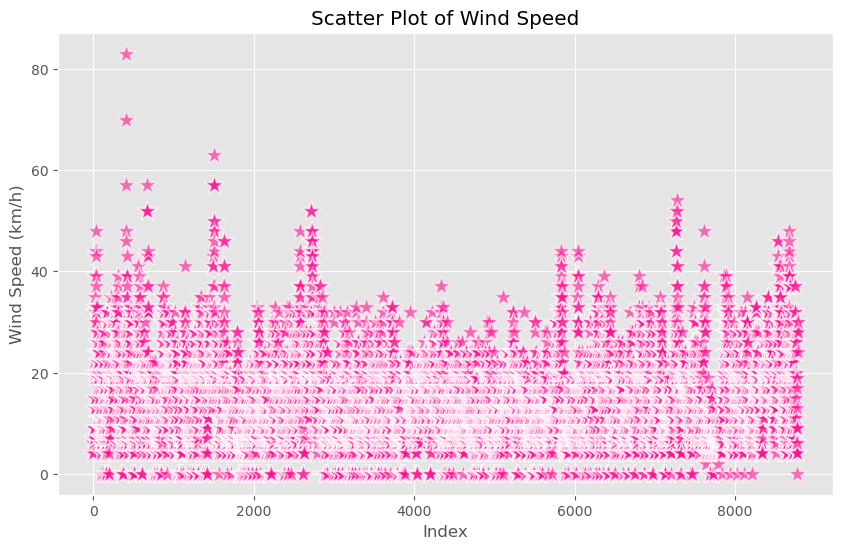

In [33]:
plt.figure(figsize=(10, 6))

# Create a scatter plot with 'Wind Speed_km/h' as the x variable and index as the y variable
sns.scatterplot(df['Wind Speed_km/h'],color='deeppink', marker='*', s=200, alpha=0.6)

# Add title and labels
plt.title('Scatter Plot of Wind Speed')
plt.xlabel('Index')
plt.ylabel('Wind Speed (km/h)')

# Display the plot
plt.show()

The majority of wind speeds fall within the range of 0-20 km/h, indicating prevailing conditions characterized by relatively moderate wind speeds.

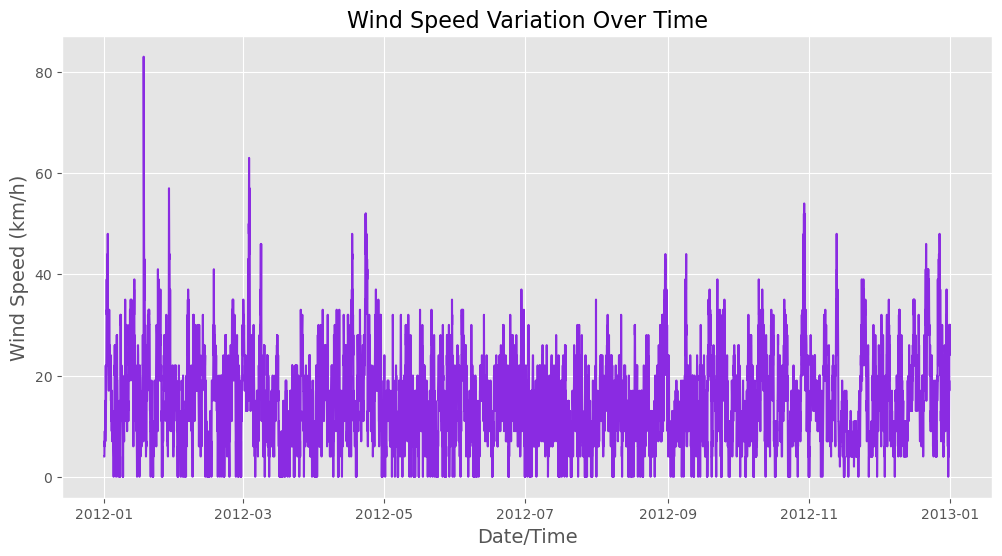

In [34]:
plt.figure(figsize=(12, 6))

# Create a line plot of wind speed over time
sns.lineplot(x='Date/Time', y='Wind Speed_km/h', data=df, color='blueviolet')

# Add title, labels, and adjust font size
plt.title('Wind Speed Variation Over Time', fontsize=16)
plt.xlabel('Date/Time', fontsize=14)
plt.ylabel('Wind Speed (km/h)', fontsize=14)

# This line plot shows the variation of wind speed over time.

# Display the plot
plt.show()

A time-series plot of wind speed unveils trends or patterns in wind behavior. Abrupt spikes signal storms or turbulent weather conditions.

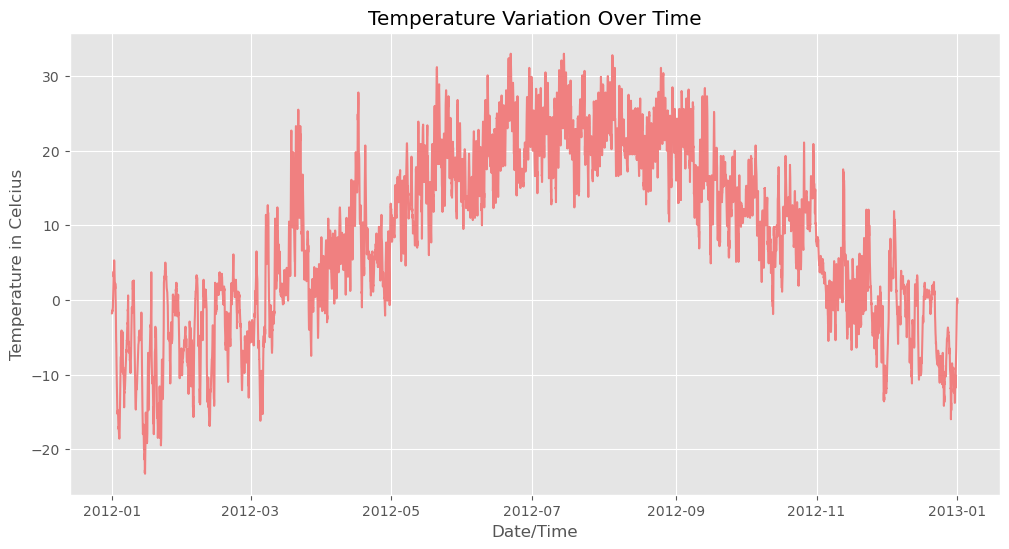

In [35]:
plt.figure(figsize=(12, 6))

# Create a line plot of wind speed over time
sns.lineplot(x='Date/Time', y='Temp_C', data=df, color='lightcoral')

# Add title, labels, and adjust font size
plt.title('Temperature Variation Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Temperature in Celcius')

# Display the plot
plt.show()

Temperature trends show a gradual increase in January, peaking in July and August, followed by a decline. High temperatures persist in summer months, contrasting with cooler conditions afterward.

C:\Users\Samiksha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


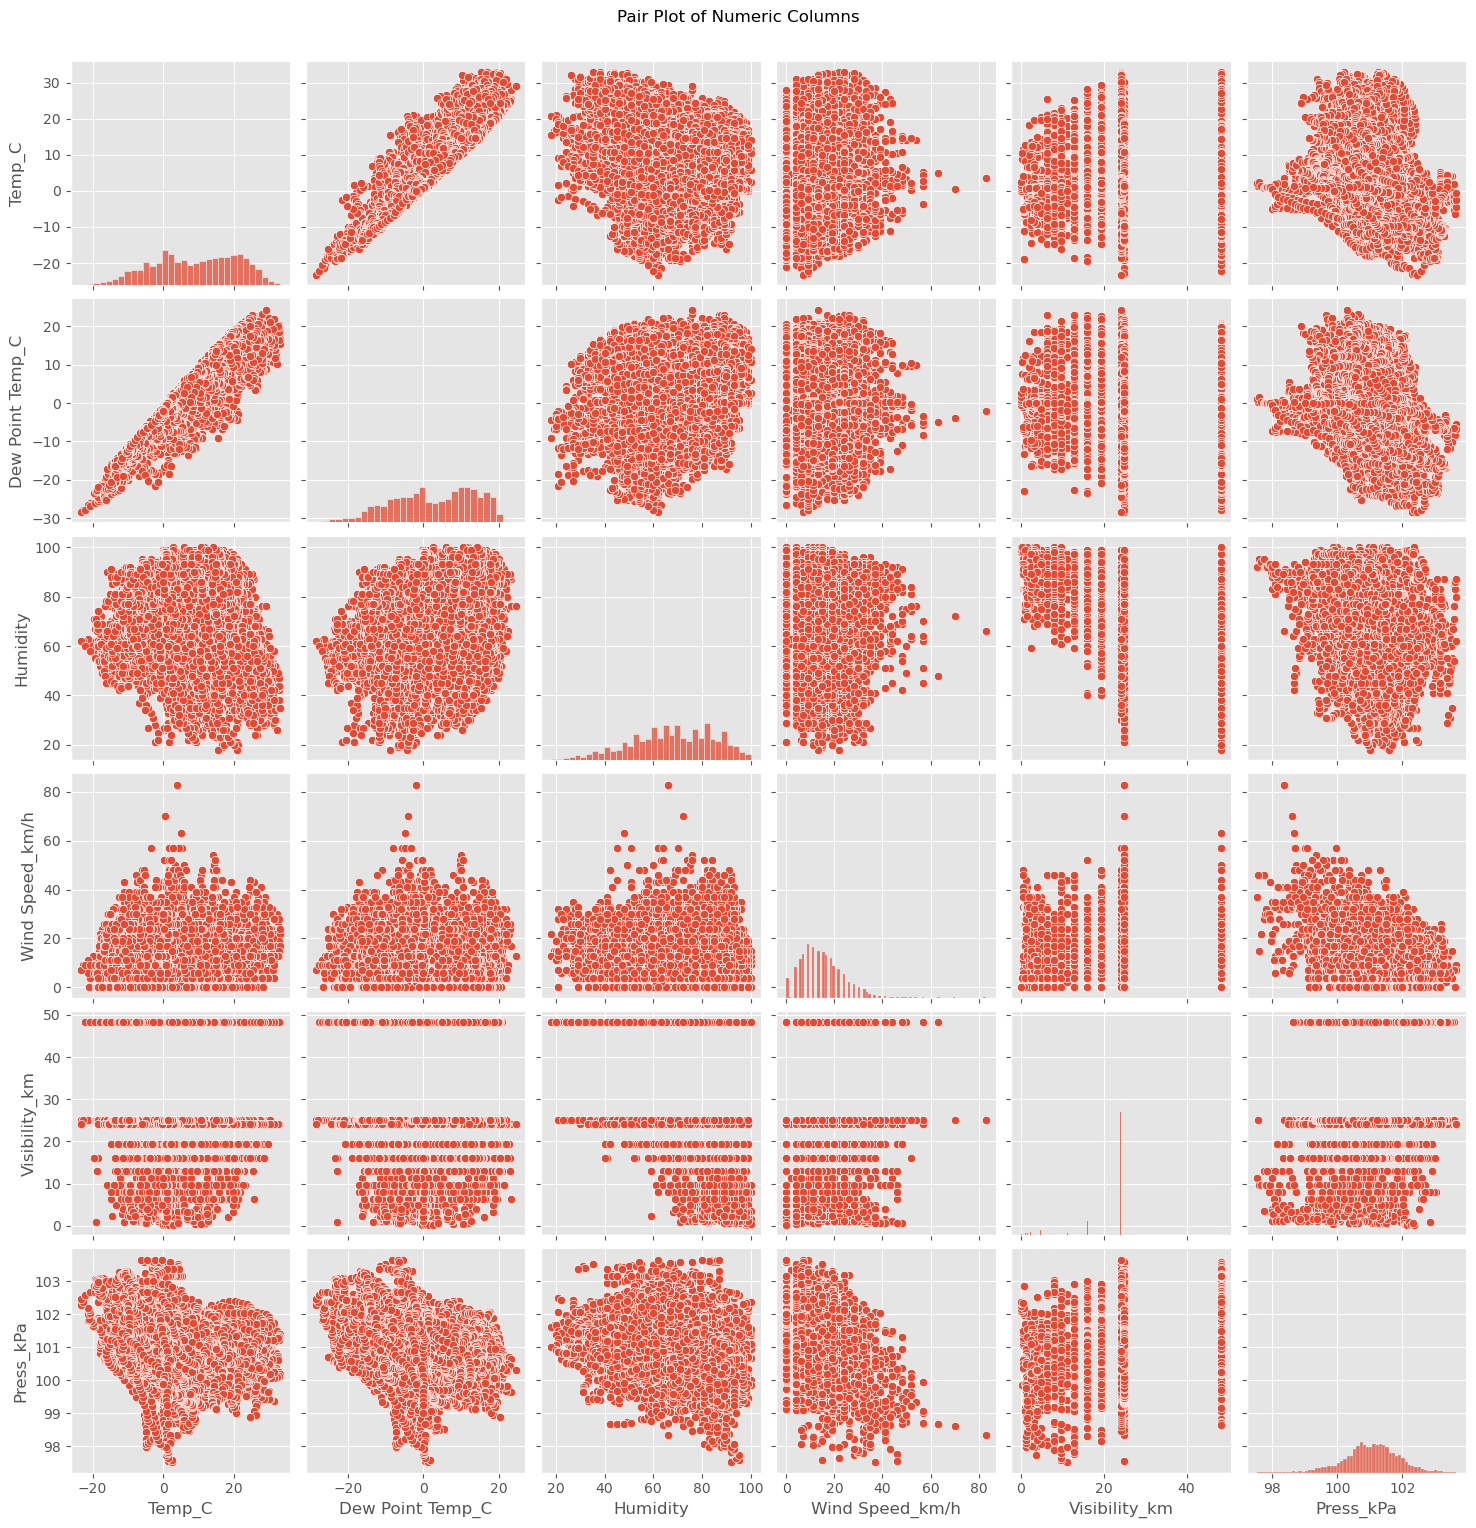

In [36]:
# Select only numerical columns for pairplot
numeric_columns = df[['Temp_C', 'Dew Point Temp_C', 'Humidity', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']]

# Plot pairplot
sns.pairplot(numeric_columns)
plt.suptitle('Pair Plot of Numeric Columns', y=1.02)
plt.show()

In [37]:
# Calculate average wind speed for each month
average_wind_speed = df.groupby('Month')['Wind Speed_km/h'].mean().reset_index()
average_wind_speed

,Month,Wind Speed_km/h
0,April,17.369444
1,August,13.931452
2,December,17.614247
3,February,14.837644
4,January,18.108871
5,July,11.887097
6,June,14.681944
7,March,14.514785
8,May,12.846774
9,November,13.973611


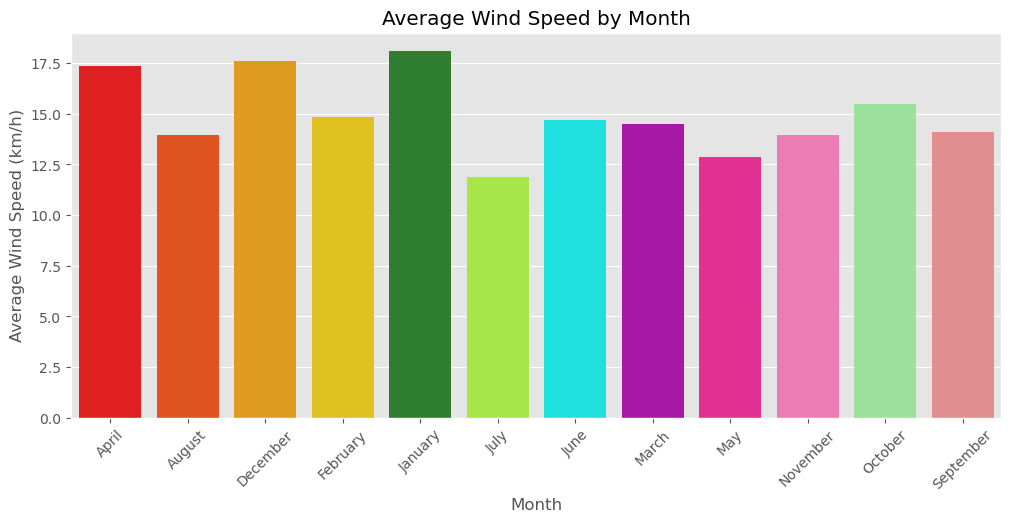

In [38]:
# Create a bar plot of average wind speed by month
plt.figure(figsize=(12, 5))
custom_palette = ['red', 'orangered', 'orange', 'gold', 'forestgreen', 'greenyellow', 'aqua', 'm', 'deeppink', 'hotpink','lightgreen','lightcoral']

sns.barplot(x='Month', y='Wind Speed_km/h', data=average_wind_speed,palette =custom_palette)

# Add title and labels
plt.title('Average Wind Speed by Month')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (km/h)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

January typically exhibits higher wind speeds (km/h) compared to July, indicating a seasonal variation in atmospheric conditions between these months.

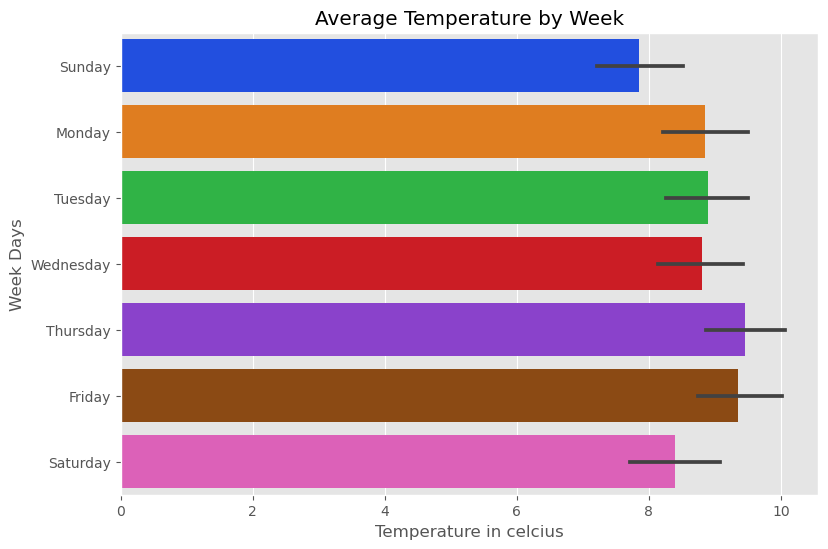

In [39]:
plt.figure(figsize=(9, 6))

# Create a bar plot
sns.barplot(x=df['Temp_C'], y=df['Week_name'], data=df, palette='bright')

# Add a title to the plot
plt.title('Average Temperature by Week')
plt.xlabel('Temperature in celcius')
plt.ylabel('Week Days')

# Display the plot
plt.show()

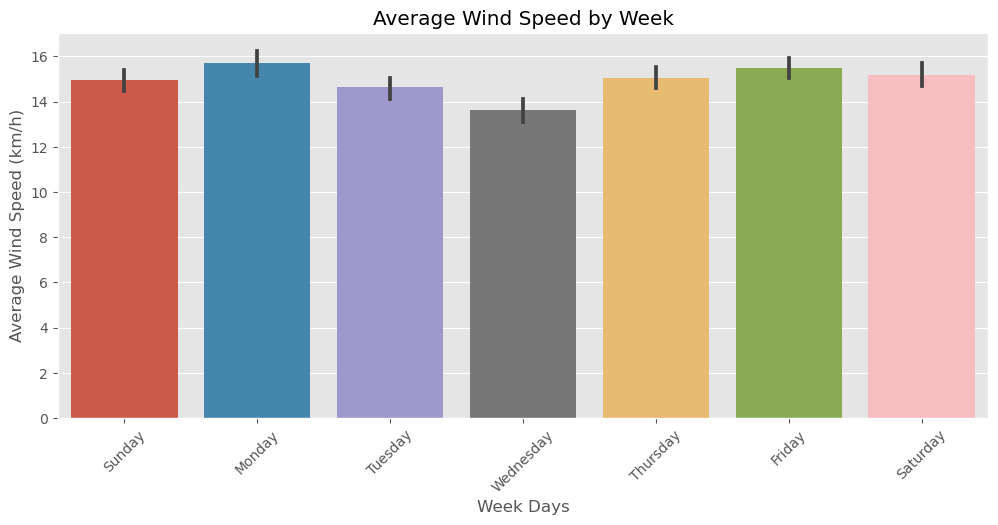

In [40]:
# Create a bar plot of average wind speed by week
plt.figure(figsize=(12, 5))
sns.barplot(x='Week_name', y='Wind Speed_km/h', data=df)

# Add title and labels
plt.title('Average Wind Speed by Week')
plt.xlabel('Week Days')
plt.ylabel('Average Wind Speed (km/h)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

Monday registers elevated wind speeds (km/h), suggesting potential weather patterns or conditions that contribute to higher wind velocities on this specific day.

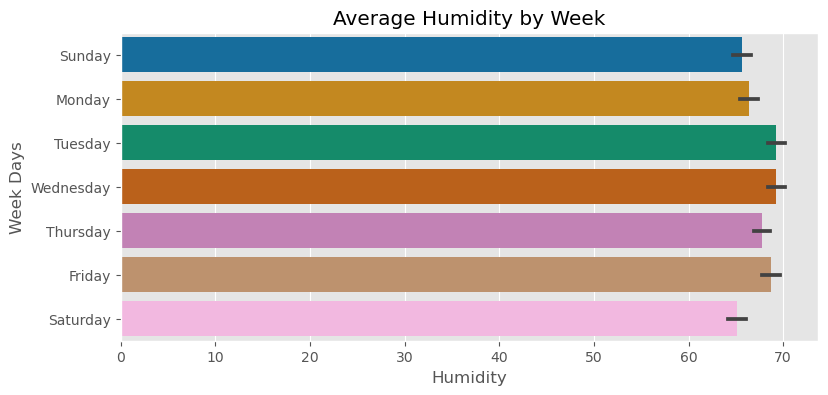

In [41]:
plt.figure(figsize=(9, 4))

# Create a bar plot
sns.barplot(x=df['Humidity'], y=df['Week_name'], data=df, palette='colorblind')

# Add a title to the plot
plt.title('Average Humidity by Week')
plt.xlabel('Humidity')
plt.ylabel('Week Days')

# Display the plot
plt.show()

The graph predominantly depicts humidity levels on Tuesdays and Wednesdays, indicating a focus on these specific days for humidity analysis.

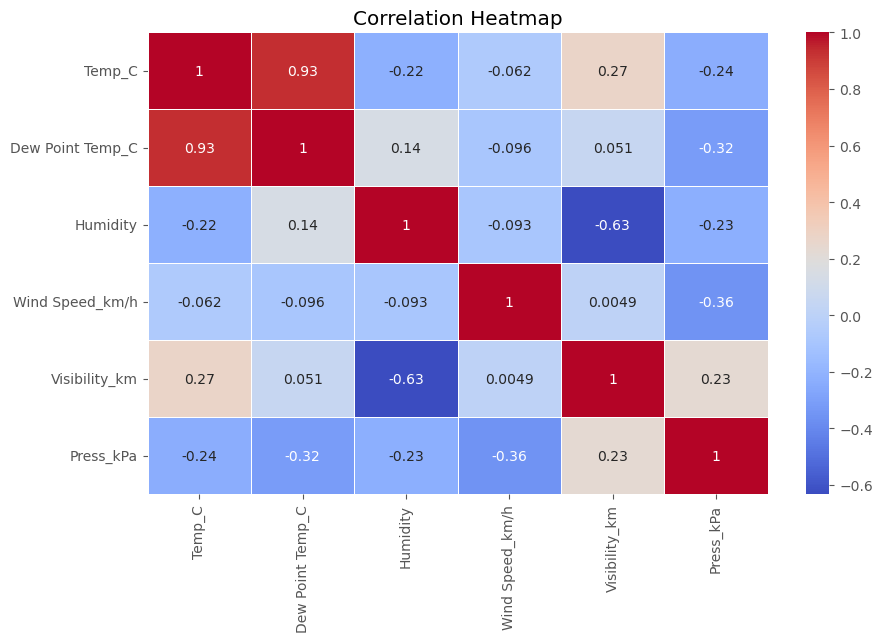

In [42]:
# Exclude non-numeric columns from correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The heatmap illustrates correlations between numeric variables. Strong positive correlations are indicated by warmer colors, while negative correlations are shown by cooler colors, aiding in identifying relationships among variables.

# Conclusion

In conclusion, this weather data analysis revealed intriguing patterns and trends over time. Seasonal variations in temperature, wind speed, and humidity were evident, with visualizations effectively illustrating key insights. The correlation analysis provided valuable relationships between different weather variables. This analysis contributes to a better understanding of the recorded weather conditions, offering insights for further exploration and applications in various domains.